In [12]:
import pandas as pd
import matplotlib.pyplot as plt

result_path = f"../result.csv"
df = pd.read_csv(result_path)

In [13]:
def method_vs_data(df):
    prefixes = ["Flan", "GPT-2", "T5"]
    return_df = []
    error_df = []
    for prefix in prefixes:
        pre_df = df[df['Model'].str.startswith(prefix)]
        dataset_groups = pre_df.groupby("Data")
        dataset_averages = dataset_groups.mean()
        errors = dataset_groups.std()
        dataset_averages = dataset_averages.assign(Model=f"{prefix} Models")
        dataset_averages = dataset_averages.reindex(columns=["Model","Accuracy_ZS", "Accuracy_CA", "Accuracy_PE", "Accuracy_FULL"])
        return_df.append(dataset_averages)
        error_df.append(errors)
    # concatenate all the dataframes
    return return_df, error_df

def method_vs_model(df):
    prefixes = ["Flan", "GPT-2", "T5"]
    return_df = []
    # group by data
    data_groups = df.groupby("Data")
    # for each group, further split by prefixes
    for data, data_df in data_groups:
        for prefix in prefixes:
            pre_df = data_df[data_df['Model'].str.startswith(prefix)]
            return_df.append(pre_df)
    return return_df

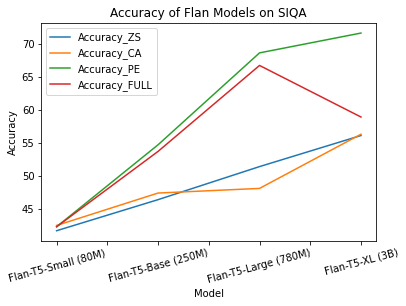

In [14]:
# group by data
data_groups = df.groupby("Data")
# data_averages = data_groups.mean()
for data, data_df in data_groups:
    pre_df = data_df[data_df['Model'].str.startswith("Flan")]

# plot pre_df with x = model, y = accuracy

pre_df.plot(x="Model", 
            y=["Accuracy_ZS", "Accuracy_CA", "Accuracy_PE", "Accuracy_FULL"],
            ylabel="Accuracy",\
            title=f"Accuracy of Flan Models on {data}",
            rot=15,)

plt.show()
# pre_df.describe()

In [15]:
model_df = method_vs_model(df)
data_df, error_df = method_vs_data(df)
flan_df, gpt2_df, t5_df  = data_df
flan_error, gpt2_error, t5_error = error_df

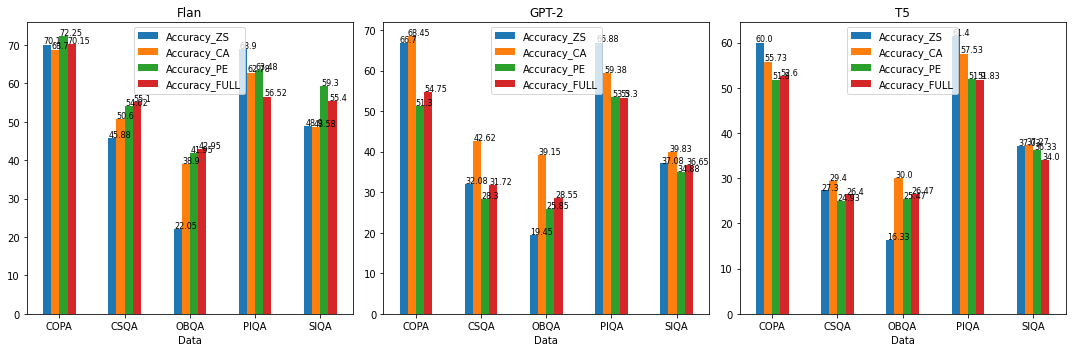

In [18]:
# Plotting: Method vs Data
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
flan_df.plot.bar(ax=axes[0], rot=0, title="Flan")
gpt2_df.plot.bar(ax=axes[1], rot=0, title="GPT-2")
t5_df.plot.bar(ax=axes[2], rot=0, title="T5")
plt.tight_layout()
# plot accuracy scores on each bar
for ax in axes:
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=8)
# plt.savefig("output.png", dpi=300)
plt.show()

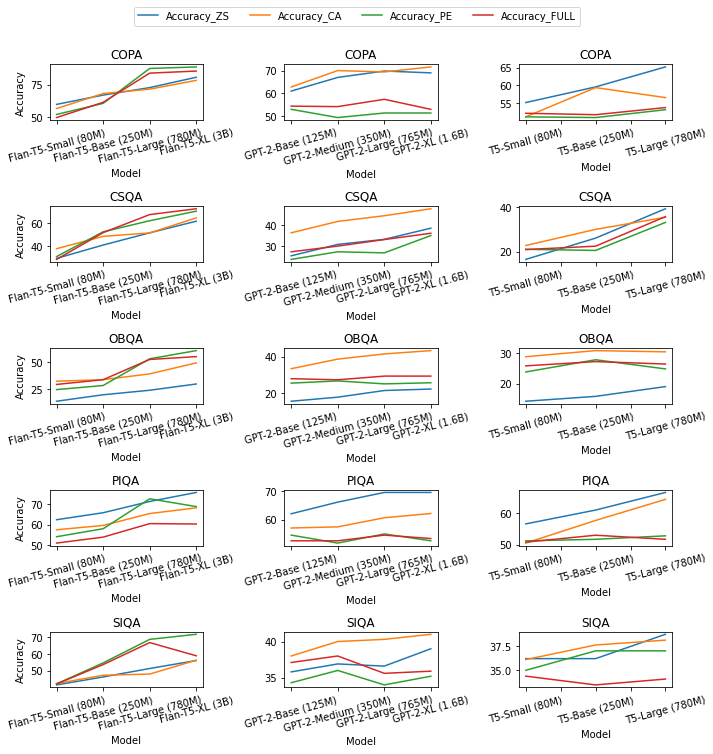

In [26]:
# Plotting: Method vs Model
fig, ax = plt.subplots(5, 3, figsize=(10, 10))
for i in range(5):
    for j in range(3):
        # provide y label for each row once
        if j == 0:
            ax[i,j].set_ylabel("Accuracy")
            
        model_df[i*3+j].plot(ax=ax[i,j],
                             x="Model",
                             y=["Accuracy_ZS", "Accuracy_CA", "Accuracy_PE", "Accuracy_FULL"],
                            #  ylabel="Accuracy",
                             title=f"{model_df[i*3+j]['Data'].iloc[0]}",
                             rot=15,
                             legend=False)

# get the legend handles and labels from one of the subplots
handles, labels = ax[-1,-1].get_legend_handles_labels()

# create a new legend for the figure using the handles and labels
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
# save with legend
# plt.savefig("output_model.png", dpi=300, bbox_inches='tight')
plt.show()


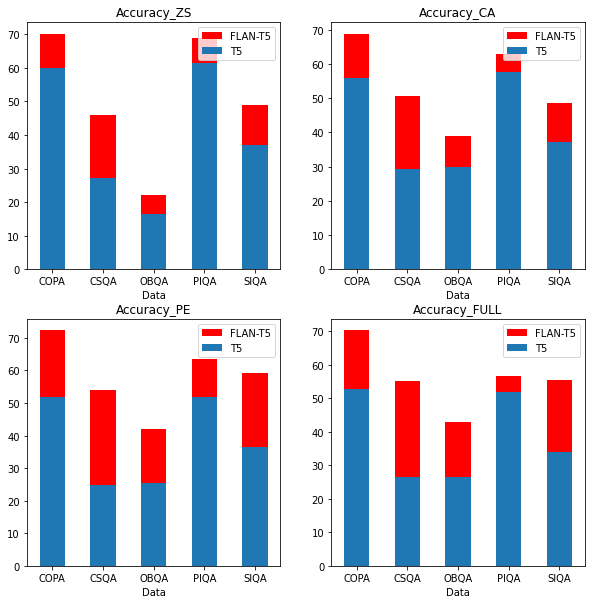

In [46]:
# create 4 subplots for 4 methods
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
# plot zs in the first subplot
# set legend to FLAN and T5
flan_df.plot.bar(ax=ax[0,0], y="Accuracy_ZS", rot=0, color="red", label="FLAN-T5")
t5_df.plot.bar(ax=ax[0,0], y="Accuracy_ZS", rot=0,title="Accuracy_ZS", label="T5")
# do the same for other three methods
flan_df.plot.bar(ax=ax[0,1], y="Accuracy_CA", rot=0, color="red", label="FLAN-T5")
t5_df.plot.bar(ax=ax[0,1], y="Accuracy_CA", rot=0,title="Accuracy_CA", label="T5")

flan_df.plot.bar(ax=ax[1,0], y="Accuracy_PE", rot=0, color="red", label="FLAN-T5")
t5_df.plot.bar(ax=ax[1,0], y="Accuracy_PE", rot=0,title="Accuracy_PE", label="T5")

flan_df.plot.bar(ax=ax[1,1], y="Accuracy_FULL", rot=0, color="red", label="FLAN-T5")
t5_df.plot.bar(ax=ax[1,1], y="Accuracy_FULL", rot=0,title="Accuracy_FULL", label="T5")

# save with legend
plt.savefig("output_inst.png", dpi=300)

In [47]:
pd.concat([flan_df, t5_df])

,Model,Accuracy_ZS,Accuracy_CA,Accuracy_PE,Accuracy_FULL
Data,,,,,
COPA,Flan Models,70.100000,68.700000,72.250000,70.150000
CSQA,Flan Models,45.875000,50.600000,54.025000,55.100000
OBQA,Flan Models,22.050000,38.900000,41.950000,42.950000
PIQA,Flan Models,68.900000,62.775000,63.475000,56.525000
SIQA,Flan Models,48.900000,48.575000,59.300000,55.400000
COPA,T5 Models,60.000000,55.733333,51.800000,52.600000
CSQA,T5 Models,27.300000,29.400000,24.933333,26.400000
OBQA,T5 Models,16.333333,30.000000,25.466667,26.466667
PIQA,T5 Models,61.400000,57.533333,51.900000,51.833333
